In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import openpathsampling as paths
storage = paths.storage.AnalysisStorage("mistis.nc")

In [2]:
mistis = storage.networks.load(0)

In [3]:
# this should be true if we restored correctly
for ens in mistis.sampling_transitions[0].ensembles:
    print ens in storage.ensembles[:], repr(ens)


True <openpathsampling.ensemble.TISEnsemble object at 0x10d039750>
True <openpathsampling.ensemble.TISEnsemble object at 0x10d027d10>
True <openpathsampling.ensemble.TISEnsemble object at 0x10d01e150>
True <openpathsampling.ensemble.TISEnsemble object at 0x10d2cb9d0>


In [4]:
mistis.hist_args['max_lambda'] = { 'bin_width' : 0.02, 'bin_range' : (-0.3, 0.5) }
mistis.hist_args['pathlength'] = { 'bin_width' : 5, 'bin_range' : (0, 150) }

In [5]:
movers = paths.MoveScheme(mistis)
movers.move_summary(storage)

repex ran 14.4278606965% of the cycles with acceptance 17/29 (0.586206896552) 
msouter_shooting ran 5.47263681592% of the cycles with acceptance 7/11 (0.636363636364) 
msouter_repex ran 6.46766169154% of the cycles with acceptance 4/13 (0.307692307692) 
pathreversal ran 19.4029850746% of the cycles with acceptance 29/39 (0.74358974359) 
shooting ran 50.2487562189% of the cycles with acceptance 65/101 (0.643564356436) 
minus ran 2.48756218905% of the cycles with acceptance 4/5 (0.8) 
msouter_pathreversal ran 0.995024875622% of the cycles with acceptance 2/2 (1.0) 


In [6]:
for trans in mistis.transitions.values():
    trans._flux = 1.0

In [7]:
mistis.rate_matrix(storage, force=True)

,"({x|opX(x) in [0.3, inf]} and {x|opY(x) in [-inf, -0.3]})","({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [-inf, -0.3]})","({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [0.3, inf]})"
"({x|opX(x) in [0.3, inf]} and {x|opY(x) in [-inf, -0.3]})",NaN,0.0733108,NaN
"({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [-inf, -0.3]})",0.2429255,NaN,0.02680567


In [8]:
trans = mistis.transitions.values()[0]
trans_hists = trans.histograms['max_lambda']

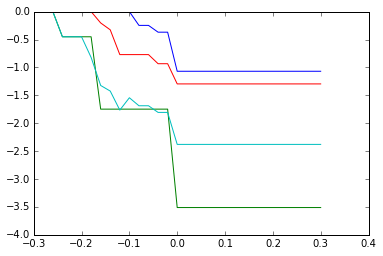

In [9]:
for hist in trans_hists:
    cross_prob = trans_hists[hist].reverse_cumulative()
    plt.plot(cross_prob.x, np.log(cross_prob))
plt.plot(trans.tcp.x, np.log(trans.tcp))